### Graficos básicos

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import metricas

c = 60

def save(n):
    #return
    plt.savefig('imagenes/{}.png'.format(n), format='png', bbox_inches='tight', dpi=250)

df = pd.read_csv('csv/X2.csv')
df

,persona,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,1,22.47530,14.049300,-11.465100,-14.886900,23.838300,19.927500,11.551600,-16.979900,7.437730,-17.781000,7.873780,1.332800,-2.380640,-0.450099,3.251770e+30
1,1,24.12210,25.333200,-10.473100,-12.993700,25.807000,31.930300,11.674800,-10.341100,16.474600,-13.166100,6.954540,0.895347,2.430350,-12.641200,7.148910e-125
2,1,27.02170,24.290600,-20.334400,-6.256260,25.039300,27.413500,5.236990,-10.268000,18.742300,-10.944600,6.331410,-8.880120,1.804740,-10.772700,1.807560e-206
3,1,24.31790,16.297100,-16.000400,-11.495300,26.724900,29.841200,12.087100,-14.836800,12.075500,-13.938300,7.375290,-3.842920,0.238595,-6.691610,-8.827170e+32
4,1,1.48922,31.140700,-22.061500,2.910900,19.727100,14.147300,-3.315630,-15.909800,5.900230,-7.197380,-1.873390,-2.557880,-12.781400,-13.304500,8.303650e+49
5,1,2.51522,17.723500,-15.817000,-3.464600,9.997840,25.432500,6.436170,-22.537500,10.298900,-18.605500,12.603800,-15.899300,3.959110,-8.139990,7.621810e+223
6,2,-24.27330,-10.830600,-15.565100,13.597300,0.498530,-6.327220,16.264700,13.471400,-5.319740,-1.239960,-6.050600,13.764100,-4.691750,-9.637020,3.105040e+231
7,2,-13.55090,-19.325700,-15.719600,14.583400,4.572340,-7.380150,10.064000,8.407140,-4.097070,-9.085560,-0.747863,13.926100,-6.205630,-6.191840,-1.277600e-190
8,2,-12.43360,-24.004600,-2.112740,16.136000,-0.461362,-11.108100,2.406060,5.893100,0.496309,-7.447720,-0.878091,7.023520,-5.607630,-6.302010,6.556900e+306
9,2,-16.52370,-23.697200,-7.505010,10.892500,-6.261760,-11.293800,8.197610,8.890970,-2.691400,-7.606340,-1.547380,11.787900,-2.301790,-5.323740,-3.742080e-122


In [ ]:
sns.lmplot('x1', 'x2', data=df[:10*9], fit_reg=False, hue="persona", palette="Paired", scatter_kws={"marker": "D","s": c})
save('1-10')

sns.lmplot('x1', 'x2', data=df[10*9:20*9], fit_reg=False, hue="persona", palette="Paired", scatter_kws={"marker": "D","s": c})
save('10-20')

sns.lmplot('x1', 'x2', data=df[20*9:30*9], fit_reg=False, hue="persona", palette="Paired", scatter_kws={"marker": "D","s": c})
save('20-30')

sns.lmplot('x1', 'x2', data=df[30*9:], fit_reg=False, hue="persona", palette="Paired", scatter_kws={"marker": "D","s": c})
save('30-41')

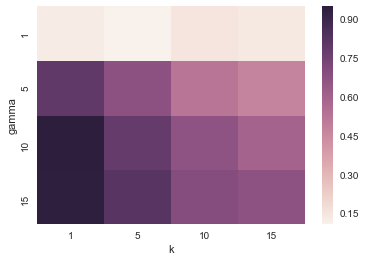

In [55]:
hitrates = pd.read_csv('csv/hitrates.csv').pivot('gamma', 'k', 'hitrate')
sns.heatmap(hitrates)

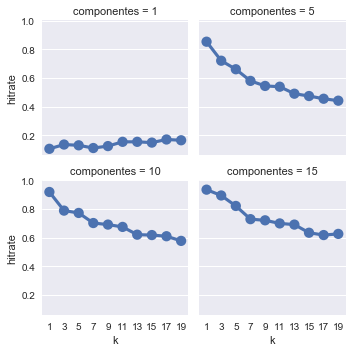

In [97]:
hitrates = pd.read_csv('csv/hitrates.csv')
g = sns.FacetGrid(hitrates, col="componentes", col_wrap=2, palette='Set1', size=2.5)
g.map(sns.pointplot, 'k', 'hitrate')
save('grid-gamma-k')

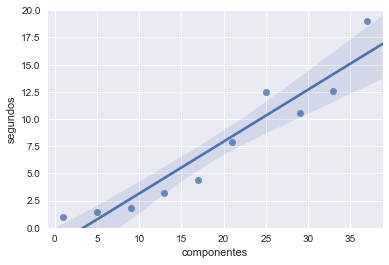

In [108]:
times = pd.read_csv('csv/times.csv')
ax = sns.regplot(x="componentes", y="segundos", data=times)
ax.set_ylim(0, 20)
save('gamma-time')

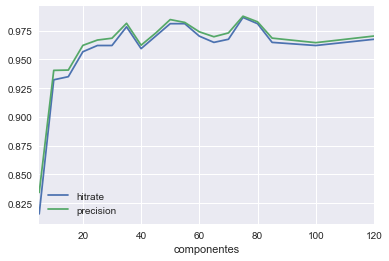

In [124]:
todo = pd.read_csv('csv/todo.csv').drop('recall', axis=1)
sns.set_style("darkgrid")
todo.plot(x="componentes")
save('componentes-f1')

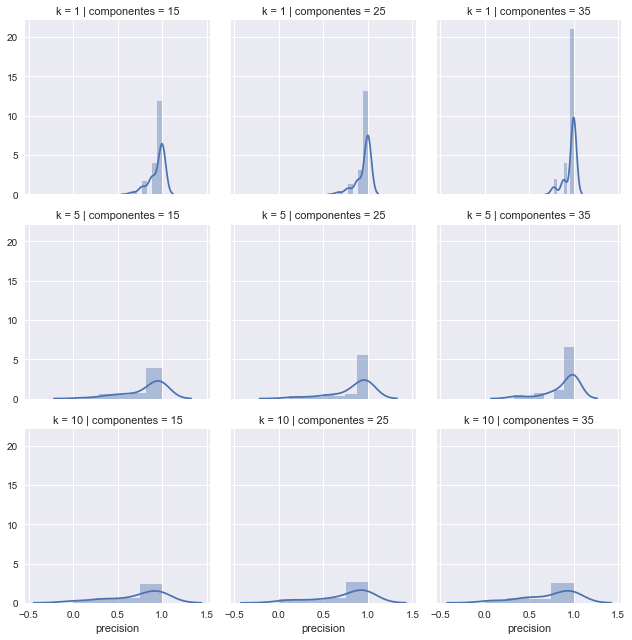

In [133]:
pr = pd.read_csv('csv/precision.csv')
g = sns.FacetGrid(pr, col="componentes",  row="k")
g = g.map(sns.distplot, "precision")
save('precision-k-gamma')

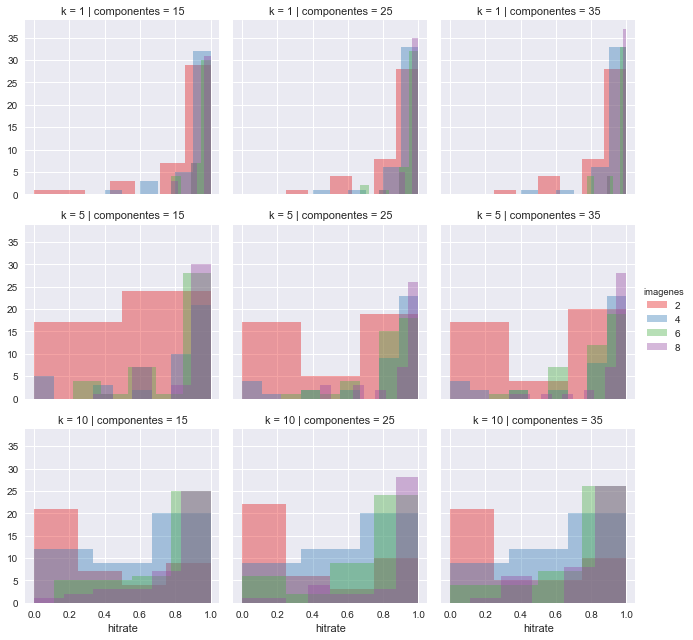

In [161]:
hr = pd.read_csv('csv/hitrate_final.csv')
g = sns.FacetGrid(hr, col="componentes",  row="k", hue='imagenes', palette='Set1')
g = g.map(sns.distplot, "hitrate", kde=False).add_legend()
save('hist-cant-gamma-k')

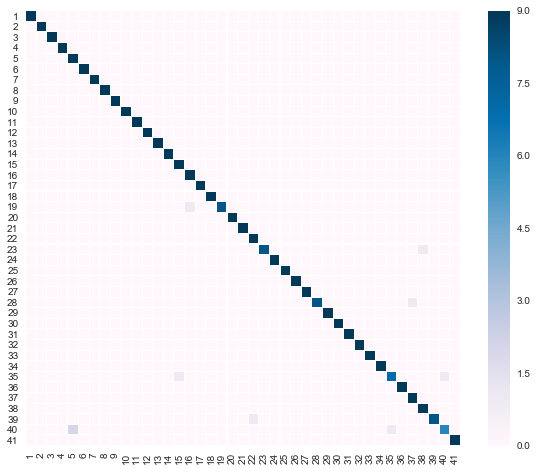

In [198]:
#r = list(execute(1))
#import pickle
#r = pickle.loads(b'\x80\x03]q\x00(K\x01K\x01\x86q\x01K\x02K\x02\x86q\x02K\x03K\x03\x86q\x03K\x04K\x04\x86q\x04K\x05K\x05\x86q\x05K\x06K\x06\x86q\x06K\x07K\x07\x86q\x07K\x08K\x08\x86q\x08K\tK\t\x86q\tK\nK\n\x86q\nK\x0bK\x0b\x86q\x0bK\x0cK\x0c\x86q\x0cK\rK\r\x86q\rK\x0eK\x0e\x86q\x0eK\x0fK\x0f\x86q\x0fK\x10K\x10\x86q\x10K\x11K\x11\x86q\x11K\x12K\x12\x86q\x12K\x13K\x13\x86q\x13K\x14K\x14\x86q\x14K\x15K\x15\x86q\x15K\x16K\x16\x86q\x16K\x17K\x17\x86q\x17K\x18K\x18\x86q\x18K\x19K\x19\x86q\x19K\x1aK\x1a\x86q\x1aK\x1bK\x1b\x86q\x1bK\x1cK\x1c\x86q\x1cK\x1dK\x1d\x86q\x1dK\x1eK\x1e\x86q\x1eK\x1fK\x1f\x86q\x1fK K \x86q K!K!\x86q!K"K"\x86q"K#K#\x86q#K$K$\x86q$K%K%\x86q%K&K&\x86q&K\'K\'\x86q\'K(K(\x86q(K)K)\x86q)K\x01K\x01\x86q*K\x02K\x02\x86q+K\x03K\x03\x86q,K\x04K\x04\x86q-K\x05K\x05\x86q.K\x06K\x06\x86q/K\x07K\x07\x86q0K\x08K\x08\x86q1K\tK\t\x86q2K\nK\n\x86q3K\x0bK\x0b\x86q4K\x0cK\x0c\x86q5K\rK\r\x86q6K\x0eK\x0e\x86q7K\x0fK\x0f\x86q8K\x10K\x10\x86q9K\x11K\x11\x86q:K\x12K\x12\x86q;K\x13K\x13\x86q<K\x14K\x14\x86q=K\x15K\x15\x86q>K\x16K\x16\x86q?K\x17K\x17\x86q@K\x18K\x18\x86qAK\x19K\x19\x86qBK\x1aK\x1a\x86qCK\x1bK\x1b\x86qDK\x1cK%\x86qEK\x1dK\x1d\x86qFK\x1eK\x1e\x86qGK\x1fK\x1f\x86qHK K \x86qIK!K!\x86qJK"K"\x86qKK#K#\x86qLK$K$\x86qMK%K%\x86qNK&K&\x86qOK\'K\'\x86qPK(K(\x86qQK)K)\x86qRK\x01K\x01\x86qSK\x02K\x02\x86qTK\x03K\x03\x86qUK\x04K\x04\x86qVK\x05K\x05\x86qWK\x06K\x06\x86qXK\x07K\x07\x86qYK\x08K\x08\x86qZK\tK\t\x86q[K\nK\n\x86q\\K\x0bK\x0b\x86q]K\x0cK\x0c\x86q^K\rK\r\x86q_K\x0eK\x0e\x86q`K\x0fK\x0f\x86qaK\x10K\x10\x86qbK\x11K\x11\x86qcK\x12K\x12\x86qdK\x13K\x13\x86qeK\x14K\x14\x86qfK\x15K\x15\x86qgK\x16K\x16\x86qhK\x17K\x17\x86qiK\x18K\x18\x86qjK\x19K\x19\x86qkK\x1aK\x1a\x86qlK\x1bK\x1b\x86qmK\x1cK\x1c\x86qnK\x1dK\x1d\x86qoK\x1eK\x1e\x86qpK\x1fK\x1f\x86qqK K \x86qrK!K!\x86qsK"K"\x86qtK#K#\x86quK$K$\x86qvK%K%\x86qwK&K&\x86qxK\'K\'\x86qyK(K(\x86qzK)K)\x86q{K\x01K\x01\x86q|K\x02K\x02\x86q}K\x03K\x03\x86q~K\x04K\x04\x86q\x7fK\x05K\x05\x86q\x80K\x06K\x06\x86q\x81K\x07K\x07\x86q\x82K\x08K\x08\x86q\x83K\tK\t\x86q\x84K\nK\n\x86q\x85K\x0bK\x0b\x86q\x86K\x0cK\x0c\x86q\x87K\rK\r\x86q\x88K\x0eK\x0e\x86q\x89K\x0fK\x0f\x86q\x8aK\x10K\x10\x86q\x8bK\x11K\x11\x86q\x8cK\x12K\x12\x86q\x8dK\x13K\x13\x86q\x8eK\x14K\x14\x86q\x8fK\x15K\x15\x86q\x90K\x16K\x16\x86q\x91K\x17K\x17\x86q\x92K\x18K\x18\x86q\x93K\x19K\x19\x86q\x94K\x1aK\x1a\x86q\x95K\x1bK\x1b\x86q\x96K\x1cK\x1c\x86q\x97K\x1dK\x1d\x86q\x98K\x1eK\x1e\x86q\x99K\x1fK\x1f\x86q\x9aK K \x86q\x9bK!K!\x86q\x9cK"K"\x86q\x9dK#K#\x86q\x9eK$K$\x86q\x9fK%K%\x86q\xa0K&K&\x86q\xa1K\'K\'\x86q\xa2K(K(\x86q\xa3K)K)\x86q\xa4K\x01K\x01\x86q\xa5K\x02K\x02\x86q\xa6K\x03K\x03\x86q\xa7K\x04K\x04\x86q\xa8K\x05K\x05\x86q\xa9K\x06K\x06\x86q\xaaK\x07K\x07\x86q\xabK\x08K\x08\x86q\xacK\tK\t\x86q\xadK\nK\n\x86q\xaeK\x0bK\x0b\x86q\xafK\x0cK\x0c\x86q\xb0K\rK\r\x86q\xb1K\x0eK\x0e\x86q\xb2K\x0fK\x0f\x86q\xb3K\x10K\x10\x86q\xb4K\x11K\x11\x86q\xb5K\x12K\x12\x86q\xb6K\x13K\x13\x86q\xb7K\x14K\x14\x86q\xb8K\x15K\x15\x86q\xb9K\x16K\x16\x86q\xbaK\x17K\x17\x86q\xbbK\x18K\x18\x86q\xbcK\x19K\x19\x86q\xbdK\x1aK\x1a\x86q\xbeK\x1bK\x1b\x86q\xbfK\x1cK\x1c\x86q\xc0K\x1dK\x1d\x86q\xc1K\x1eK\x1e\x86q\xc2K\x1fK\x1f\x86q\xc3K K \x86q\xc4K!K!\x86q\xc5K"K"\x86q\xc6K#K(\x86q\xc7K$K$\x86q\xc8K%K%\x86q\xc9K&K&\x86q\xcaK\'K\'\x86q\xcbK(K(\x86q\xccK)K)\x86q\xcdK\x01K\x01\x86q\xceK\x02K\x02\x86q\xcfK\x03K\x03\x86q\xd0K\x04K\x04\x86q\xd1K\x05K\x05\x86q\xd2K\x06K\x06\x86q\xd3K\x07K\x07\x86q\xd4K\x08K\x08\x86q\xd5K\tK\t\x86q\xd6K\nK\n\x86q\xd7K\x0bK\x0b\x86q\xd8K\x0cK\x0c\x86q\xd9K\rK\r\x86q\xdaK\x0eK\x0e\x86q\xdbK\x0fK\x0f\x86q\xdcK\x10K\x10\x86q\xddK\x11K\x11\x86q\xdeK\x12K\x12\x86q\xdfK\x13K\x0b\x86q\xe0K\x14K\x14\x86q\xe1K\x15K\x15\x86q\xe2K\x16K\x16\x86q\xe3K\x17K\x17\x86q\xe4K\x18K\x18\x86q\xe5K\x19K\x19\x86q\xe6K\x1aK\x1a\x86q\xe7K\x1bK\x1b\x86q\xe8K\x1cK\x1c\x86q\xe9K\x1dK\x1d\x86q\xeaK\x1eK\x1e\x86q\xebK\x1fK\x1f\x86q\xecK K \x86q\xedK!K!\x86q\xeeK"K"\x86q\xefK#K#\x86q\xf0K$K$\x86q\xf1K%K%\x86q\xf2K&K&\x86q\xf3K\'K\'\x86q\xf4K(K(\x86q\xf5K)K)\x86q\xf6K\x01K\x01\x86q\xf7K\x02K\x02\x86q\xf8K\x03K\x03\x86q\xf9K\x04K\x04\x86q\xfaK\x05K\x05\x86q\xfbK\x06K\x06\x86q\xfcK\x07K\x07\x86q\xfdK\x08K\x08\x86q\xfeK\tK\t\x86q\xffK\nK\n\x86r\x00\x01\x00\x00K\x0bK\x0b\x86r\x01\x01\x00\x00K\x0cK\x0c\x86r\x02\x01\x00\x00K\rK\r\x86r\x03\x01\x00\x00K\x0eK\x0e\x86r\x04\x01\x00\x00K\x0fK\x0f\x86r\x05\x01\x00\x00K\x10K\x10\x86r\x06\x01\x00\x00K\x11K\x11\x86r\x07\x01\x00\x00K\x12K\x12\x86r\x08\x01\x00\x00K\x13K\x13\x86r\t\x01\x00\x00K\x14K\x14\x86r\n\x01\x00\x00K\x15K\x15\x86r\x0b\x01\x00\x00K\x16K\x16\x86r\x0c\x01\x00\x00K\x17K\x17\x86r\r\x01\x00\x00K\x18K\x18\x86r\x0e\x01\x00\x00K\x19K\x19\x86r\x0f\x01\x00\x00K\x1aK\x1a\x86r\x10\x01\x00\x00K\x1bK\x1b\x86r\x11\x01\x00\x00K\x1cK\x1c\x86r\x12\x01\x00\x00K\x1dK\x1d\x86r\x13\x01\x00\x00K\x1eK\x1e\x86r\x14\x01\x00\x00K\x1fK\x1f\x86r\x15\x01\x00\x00K K \x86r\x16\x01\x00\x00K!K!\x86r\x17\x01\x00\x00K"K"\x86r\x18\x01\x00\x00K#K#\x86r\x19\x01\x00\x00K$K$\x86r\x1a\x01\x00\x00K%K%\x86r\x1b\x01\x00\x00K&K&\x86r\x1c\x01\x00\x00K\'K\'\x86r\x1d\x01\x00\x00K(K(\x86r\x1e\x01\x00\x00K)K)\x86r\x1f\x01\x00\x00K\x01K\x01\x86r \x01\x00\x00K\x02K\x02\x86r!\x01\x00\x00K\x03K\x03\x86r"\x01\x00\x00K\x04K\x04\x86r#\x01\x00\x00K\x05K\x05\x86r$\x01\x00\x00K\x06K\x06\x86r%\x01\x00\x00K\x07K\x07\x86r&\x01\x00\x00K\x08K\x08\x86r\'\x01\x00\x00K\tK\t\x86r(\x01\x00\x00K\nK\n\x86r)\x01\x00\x00K\x0bK\x0b\x86r*\x01\x00\x00K\x0cK\x0c\x86r+\x01\x00\x00K\rK\r\x86r,\x01\x00\x00K\x0eK\x0e\x86r-\x01\x00\x00K\x0fK\x0f\x86r.\x01\x00\x00K\x10K\x10\x86r/\x01\x00\x00K\x11K\x11\x86r0\x01\x00\x00K\x12K\x12\x86r1\x01\x00\x00K\x13K\x13\x86r2\x01\x00\x00K\x14K\x14\x86r3\x01\x00\x00K\x15K\x15\x86r4\x01\x00\x00K\x16K\x16\x86r5\x01\x00\x00K\x17K\x17\x86r6\x01\x00\x00K\x18K\x18\x86r7\x01\x00\x00K\x19K\x19\x86r8\x01\x00\x00K\x1aK\x1a\x86r9\x01\x00\x00K\x1bK\x1b\x86r:\x01\x00\x00K\x1cK\x1c\x86r;\x01\x00\x00K\x1dK\x1d\x86r<\x01\x00\x00K\x1eK\x1e\x86r=\x01\x00\x00K\x1fK\x1f\x86r>\x01\x00\x00K K \x86r?\x01\x00\x00K!K!\x86r@\x01\x00\x00K"K"\x86rA\x01\x00\x00K#K#\x86rB\x01\x00\x00K$K$\x86rC\x01\x00\x00K%K%\x86rD\x01\x00\x00K&K&\x86rE\x01\x00\x00K\'K\'\x86rF\x01\x00\x00K(K(\x86rG\x01\x00\x00K)K)\x86rH\x01\x00\x00K\x01K\x01\x86rI\x01\x00\x00K\x02K\x02\x86rJ\x01\x00\x00K\x03K\x03\x86rK\x01\x00\x00K\x04K\x04\x86rL\x01\x00\x00K\x05K\x05\x86rM\x01\x00\x00K\x06K\x06\x86rN\x01\x00\x00K\x07K\x07\x86rO\x01\x00\x00K\x08K\x08\x86rP\x01\x00\x00K\tK\t\x86rQ\x01\x00\x00K\nK\n\x86rR\x01\x00\x00K\x0bK\x0b\x86rS\x01\x00\x00K\x0cK\x0c\x86rT\x01\x00\x00K\rK\r\x86rU\x01\x00\x00K\x0eK\x0e\x86rV\x01\x00\x00K\x0fK\x0f\x86rW\x01\x00\x00K\x10K\x10\x86rX\x01\x00\x00K\x11K\x11\x86rY\x01\x00\x00K\x12K\x12\x86rZ\x01\x00\x00K\x13K\x13\x86r[\x01\x00\x00K\x14K\x14\x86r\\\x01\x00\x00K\x15K\x15\x86r]\x01\x00\x00K\x16K\x16\x86r^\x01\x00\x00K\x17K\x17\x86r_\x01\x00\x00K\x18K\x18\x86r`\x01\x00\x00K\x19K\x19\x86ra\x01\x00\x00K\x1aK\x1a\x86rb\x01\x00\x00K\x1bK\x1b\x86rc\x01\x00\x00K\x1cK\x1c\x86rd\x01\x00\x00K\x1dK\x1d\x86re\x01\x00\x00K\x1eK\x1e\x86rf\x01\x00\x00K\x1fK\x1f\x86rg\x01\x00\x00K K \x86rh\x01\x00\x00K!K!\x86ri\x01\x00\x00K"K"\x86rj\x01\x00\x00K#K#\x86rk\x01\x00\x00K$K$\x86rl\x01\x00\x00K%K%\x86rm\x01\x00\x00K&K&\x86rn\x01\x00\x00K\'K\'\x86ro\x01\x00\x00K(K\x05\x86rp\x01\x00\x00K)K)\x86rq\x01\x00\x00e.')

m=metricas.confusion_matrix(r)
plt.figure(figsize=(10,8))
sns.heatmap(m, cbar=True, linewidths=.1, square=True, cmap='PuBu', xticklabels=np.arange(1,42), yticklabels=np.arange(1,42))
save('confusion-3fold')

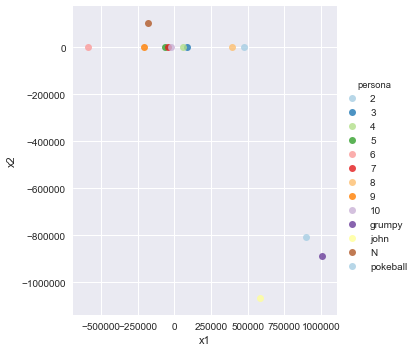

In [204]:
crs = pd.read_csv('centroides.csv')
sns.lmplot(x='x1', y='x2', data=crs, hue='persona', fit_reg=False, palette='Paired')

### Meshgrid de knn (no anda)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

def plot(df, k, step):
    data = df.as_matrix()
    X = data[:,1:3] # columns 2 and 3
    y = data[:,0]

    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap="Set2")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Dark2")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("k = %i" % (k,))

ModuleNotFoundError: No module named 'sklearn'